<a href="https://colab.research.google.com/github/MuhammadTaha25/Deep-Learning/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### CNN

In [26]:
# Load the MNIST dataset of 28×28 grayscale images of handwritten digits (0–9)
from tensorflow.keras.datasets import mnist

# Create a sequential (linear) stack of neural network layers
from tensorflow.keras.models import Sequential

# Import commonly used layers:
# Dense      – fully connected (dense) layer
# Flatten    – flattens 2D feature maps into 1D vectors
# Conv2D     – 2D convolutional layer for feature extraction
# MaxPooling2D – downsampling layer that reduces spatial dimensions
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

# Utility for converting integer labels into one-hot encoded vectors
from tensorflow.keras.utils import to_categorical

# to visualize image and graphs
import matplotlib.pyplot as plt

In [27]:
# Load the MNIST dataset:
# x_train, y_train contain the training images and labels respectively,
# x_test, y_test contain the testing images and labels respectively.
(x_train, y_train), (x_test, y_test) = mnist.load_data()


In [28]:
# Print the shape
shape = x_train.shape
print("Shape of x_train:", shape)

Shape of x_train: (60000, 28, 28)


In [29]:
# Reshape the training images to include a single-channel dimension:
# original shape: (num_samples, 28, 28)
# new shape:      (num_samples, 28, 28, 1)
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)

# Reshape the test images in the same way:
# original shape: (num_samples, 28, 28)
# new shape:      (num_samples, 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)


In [30]:
# Convert the pixel values from integers to 32-bit floats for numerical precision
x_train = x_train.astype('float32')
x_test  = x_test.astype('float32')

# Normalize the pixel values from the range [0, 255] to [0.0, 1.0]
# This helps the network train more stably and converge faster
x_train /= 255.0
x_test  /= 255.0

In [31]:

# Convert the integer class labels to one-hot encoded vectors of length 10
# For example, label 3 becomes [0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
y_train = to_categorical(y_train, 10)
y_test  = to_categorical(y_test, 10)


In [32]:
# Define the number of convolutional filters for each Conv2D layer in the model:
# - First layer will have 32 filters
# - Second layer will have 64 filters
# - Third layer will have 80 filters
# - Fourth layer will have 110 filters
filters = [32, 64, 80, 110]


In [33]:
# Initialize a sequential model to stack layers linearly
model = Sequential()

# 1st convolutional block:
# - Apply 32 filters of size 3×3
# - Use 'same' padding to keep spatial dimensions (28×28)
# - Apply ReLU activation for non-linearity
# - Specify input shape as 28×28 with 1 channel (grayscale)
model.add(Conv2D(filters[0],
                 kernel_size=(3, 3),
                 padding='same',
                 activation='relu',
                 input_shape=(28, 28, 1)))
# - Downsample feature maps by a factor of 2 (to 14×14)
model.add(MaxPooling2D(pool_size=(2, 2)))

# 2nd convolutional block:
# - Apply 64 filters of size 3×3
# - Keep spatial dimensions with 'same' padding (14×14)
# - Apply ReLU activation
model.add(Conv2D(filters[1],
                 kernel_size=(3, 3),
                 padding='same',
                 activation='relu'))
# - Downsample to 7×7
model.add(MaxPooling2D(pool_size=(2, 2)))

# 3rd convolutional block:
# - Apply 80 filters of size 3×3
# - Maintain 7×7 spatial dimensions
# - Apply ReLU activation
model.add(Conv2D(filters[2],
                 kernel_size=(3, 3),
                 padding='same',
                 activation='relu'))
# - Further downsample (to 3×3)
model.add(MaxPooling2D(pool_size=(2, 2)))

# 4th convolutional block:
# - Apply 110 filters of size 3×3
# - Maintain 3×3 spatial dimensions
# - Apply ReLU activation
model.add(Conv2D(filters[3],
                 kernel_size=(3, 3),
                 padding='same',
                 activation='relu'))
# - Final downsampling (to 1×1)
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the 1×1×110 output into a 110-dimensional vector
model.add(Flatten())

# Fully connected dense layer:
# - 128 neurons
# - ReLU activation for non-linearity
model.add(Dense(128, activation='relu'))

# Output layer:
# - 10 neurons (one per digit class)
# - Softmax activation to produce class probabilities
model.add(Dense(10, activation='softmax'))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [34]:
# Configure the learning process before training:
# - loss: use categorical cross-entropy for multi-class classification
# - optimizer: stochastic gradient descent (SGD) to update weights
# - metrics: track accuracy during training and evaluation
model.compile(
    loss='categorical_crossentropy',
    optimizer='sgd',
    metrics=['accuracy']
)


In [35]:
# print model summary
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 7, 7, 80)       │        46,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 3, 3, 80)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 3, 3, 110)      │        79,310 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 1, 1, 110)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 110)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        14,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 159,784 (624.16 KB)

 Trainable params: 159,784 (624.16 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Import the time function to measure training duration
from time import time

# Record the start time before beginning training
tic = time()

# Train the model on the training data:
# - x_train, y_train: training inputs and labels
# - epochs=15: number of passes through the entire dataset
# - batch_size=250: number of samples per gradient update
# - verbose=1: display progress bar and epoch logs
model.fit(
    x_train,
    y_train,
    epochs=15,
    batch_size=250,
    verbose=1
)

# Record the end time after training completes
toc = time()

# Calculate and print the total training time in seconds
print("Time taken for model training:", toc - tic, "seconds")


In [ ]:
import numpy as np
y_pred_probs=model.predict(x_test)
y_pred=np.where(y_pred_probs>0.5,1,0)

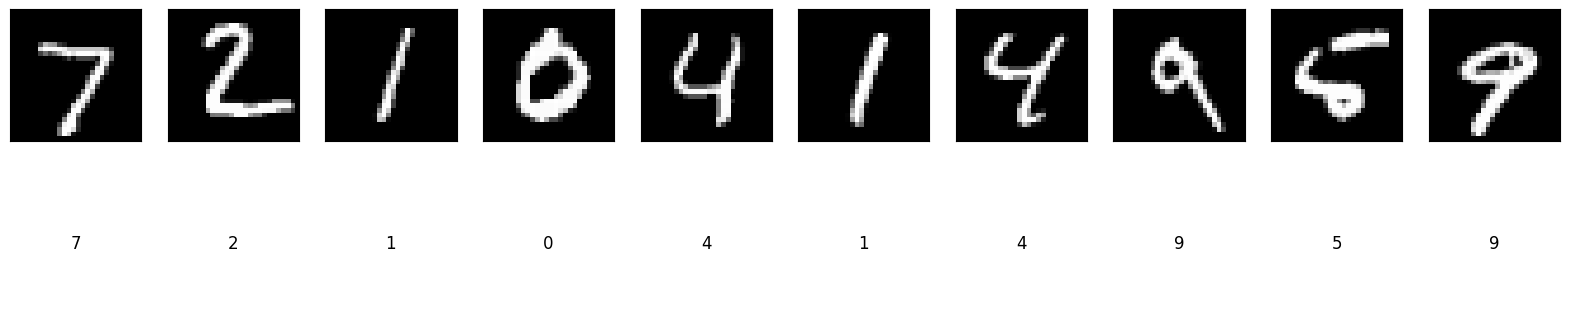

In [36]:
# Set up a figure to display images
n = 10
plt.figure(figsize=(20, 4))

for i in range(n):
    # Display the original image
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display the predicted digit
    predicted_digit = np.argmax(y_pred_probs[i])
    ax = plt.subplot(2, n, i + 1 + n)
    plt.text(0.5, 0.5, str(predicted_digit), fontsize=12, ha='center', va='center')
    plt.axis('off')

# Show the plotted images
plt.show()

# Close the plot